# Importing the libraries

In [50]:
#For SMOTE
#! pip install imblearn

In [51]:
#! pip install statsmodels

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#Reading the data
data=pd.read_csv("banking.csv",header=0)
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
#Identifying the data types
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [6]:
#Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# We will use K-means Clustering technique to create a column inorder to identify the clusters

In [4]:
data_clust = data.loc[:,['age','duration','campaign','pdays','previous']]

In [7]:
#Importing the K-Means class
from sklearn.cluster import KMeans

wcss = []
#We will fit the kmeans algorithm to our data and then find the wcss for each number of clusters and 
#append it to the wcss list declared above
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
    # the purpose of max_iter : Each time you click update centroids, a new iteration is performed. 
    #It makes sense, because when centroids are moved, distances to those centroids also change and some
    #points may change cluster.
    #n_init : the number of times k means algorithm will run with different initial centroids(default is 10)
    kmeans.fit(data_clust)
    wcss.append(kmeans.inertia_) 
#We will then use the elbow method to determine the number of clusters    

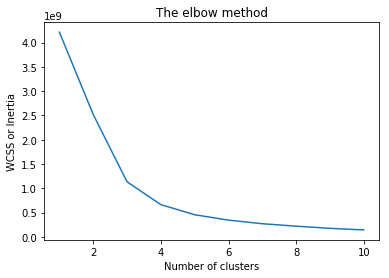

In [8]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS or Inertia')
plt.show()

In [9]:
#the optimal number of clusters seems to be 3
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter=300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(data_clust)

In [10]:
y_kmeans = pd.DataFrame(y_kmeans,columns=['Cluster'],copy=True)

In [11]:
#merging the cluster column with the rest of the data
df_test = pd.merge(data, y_kmeans, left_index=True, right_index=True)
df_test['Cluster'].astype(int)

0        0
1        0
2        2
3        0
4        2
5        0
6        0
7        0
8        2
9        0
10       0
11       1
12       0
13       0
14       1
15       0
16       1
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       2
28       1
29       0
        ..
41158    0
41159    0
41160    0
41161    0
41162    1
41163    0
41164    0
41165    0
41166    0
41167    0
41168    0
41169    1
41170    0
41171    1
41172    1
41173    0
41174    0
41175    0
41176    0
41177    0
41178    0
41179    0
41180    0
41181    0
41182    0
41183    0
41184    0
41185    0
41186    0
41187    0
Name: Cluster, Length: 41188, dtype: int32

# Reducing the categories of education column and combining them into one category 'Basic'

In [12]:
#Checking the unique values of education column
list(df_test['education'].unique())

['basic.4y',
 'unknown',
 'university.degree',
 'high.school',
 'basic.9y',
 'professional.course',
 'basic.6y',
 'illiterate']

In [13]:
#Grouping “basic.4y”, “basic.9y” and “basic.6y” together as “basic”.

df_test['education']=np.where(df_test['education']=='basic.9y','Basic',df_test['education'])
df_test['education']=np.where(df_test['education'] =='basic.6y', 'Basic', df_test['education'])
df_test['education']=np.where(df_test['education'] =='basic.4y', 'Basic', df_test['education'])

#After grouping, this is the column:
list(df_test['education'].unique())

['Basic',
 'unknown',
 'university.degree',
 'high.school',
 'professional.course',
 'illiterate']

# Data exploration

In [14]:
df_test['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

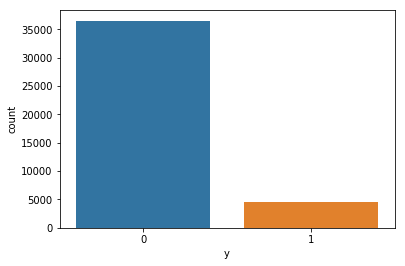

In [15]:
sns.countplot(x='y',data=df_test)
plt.show()

In [16]:
#calculating the proportion of 0 and 1 in the target column
count_no_sub=len(df_test[df_test['y']==0])
count_sub=len(df_test[df_test['y']==1])
pct_no_sub=count_no_sub/(count_no_sub+count_sub)
print("Percentage of people who have not subscribed is: ",pct_no_sub * 100)
pct_sub= count_sub/(count_no_sub+count_sub)
print("Percentage of people who have subscribed is: ",pct_sub * 100)

Percentage of people who have not subscribed is:  88.73458288821988
Percentage of people who have subscribed is:  11.265417111780131


# Classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. 

In [66]:
#Some more data exploration

In [17]:
df_test.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Cluster
y,,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.108132
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.829741


# Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [18]:
df_test.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,Cluster
job,,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726,0.200537
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943,0.150638
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165,0.165522
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000,0.176415
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175,0.187073
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326,0.329651
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856,0.168895
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381,0.159486
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286,0.440000


In [19]:
df_test.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,Cluster
marital,,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209,0.172376
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573,0.179677
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041,0.216200
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000,0.337500


In [20]:
df_test.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,Cluster
education,,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029,0.170063
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355,0.188439
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485,0.185390
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245,0.206114
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003,0.229347


# Visualizations

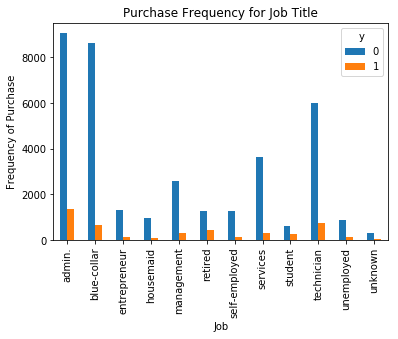

In [21]:
%matplotlib inline
pd.crosstab(df_test.job,df_test.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

#The frequency of purchase of the deposit depends on the job title. Thus, the job title can be a good predictor of the outcome variable.

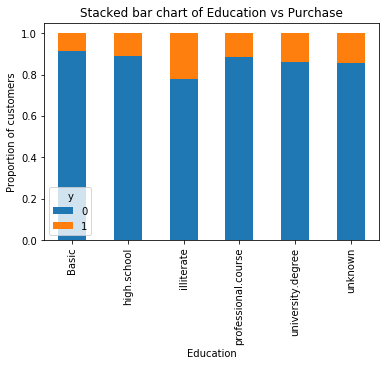

In [22]:
table=pd.crosstab(df_test.education,df_test.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')
plt.savefig('edu_vs_pur_stack')

#Education seems a good predictor of the outcome variable.

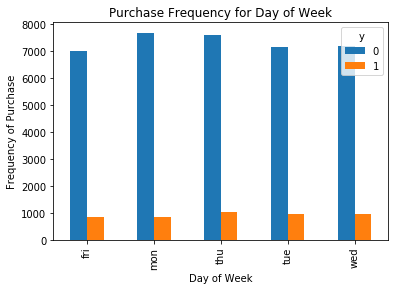

In [23]:
pd.crosstab(df_test.day_of_week,df_test.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

#Day of week may not be a good predictor of the outcome.

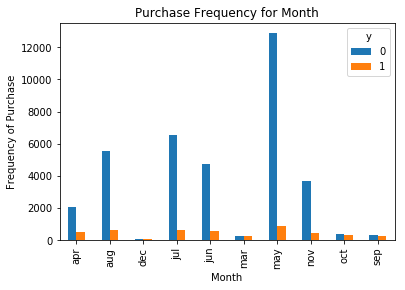

In [24]:
pd.crosstab(df_test.month,df_test.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

#Month might be a good predictor of the outcome variable.

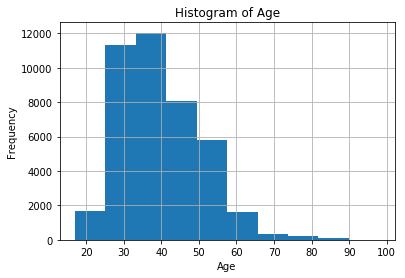

In [25]:
df_test.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

##Most of the customers of the bank in this dataset are in the age range of 30–40.

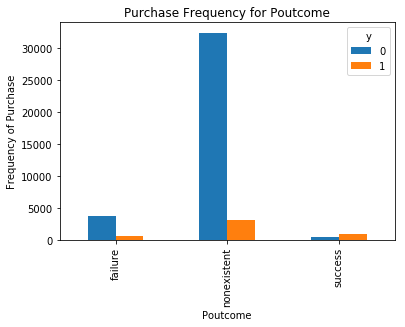

In [26]:
pd.crosstab(df_test.poutcome,df_test.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [77]:
# Poutcome seems to be a good predictor of the outcome variable.

# Creating dummy variables

In [27]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_dummies = pd.get_dummies(df_test, columns = cat_vars, drop_first =False)
df_dummies.columns.values
df = df_dummies

# Handling the imbalanced data set . Applying the SMOTE technique
** Note : Apply SMOTE only on train data,because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [28]:
x = df.loc[:,df.columns !='y']
y = df.loc[:,df.columns =='y']
print("Number of subscription before applying SMOTE: ",len((y[y['y']==1])))

Number of subscription before applying SMOTE:  4640


In [32]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns= x_train.columns

os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x=pd.DataFrame(data=os_data_x, columns = columns)
os_data_y=pd.DataFrame(data=os_data_y,columns= ['y'])

print("length of oversampled data is: ",len(os_data_x))
print("Number of no subscription in oversampled data: ",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription in oversampled data: ",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is: ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is: ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is:  51134
Number of no subscription in oversampled data:  25567
Number of subscription in oversampled data:  25567
Proportion of no subscription data in oversampled data is:  0.5
Proportion of subscription data in oversampled data is:  0.5



# Recursive Feature Elimination

In [33]:
from sklearn.feature_selection import RFE
#Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

 Using Logistic Regression

In [35]:
logreg1=LogisticRegression(solver="liblinear")
rfe_lr=RFE(logreg1,20)
rfe_lr = rfe_lr.fit(os_data_x,os_data_y.values.ravel())
print(rfe_lr.support_)
print(rfe_lr.ranking_)

[False False False False False False False False  True False  True False
  True False False False  True False  True  True False False False False
 False False False False False  True False False False  True  True False
 False False False False False False  True  True  True False  True  True
 False  True  True  True  True False False False False False False  True
  True False]
[40 36 19 43 16  4 22 24  1 27  1 28  1 29 20  9  1  6  1  1 10 12  5 31
 25 15 38  7  8  1 18 35 17  1  1 42 37 32 41 26 33 13  1  1  1  2  1  1
  3  1  1  1  1 23 21 14 34 30 11  1  1 39]


In [36]:
os_data_x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'Cluster', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',


In [37]:
#Selecting columns for the Logistic Regression Model
cols_lr=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success","Cluster"] 
x_lr=os_data_x[cols_lr]
y_lr=os_data_y['y']

In [38]:
#Model summary for eliminating features by observing the p-values
import statsmodels.api as sm
logit_model=sm.Logit(y_lr,x_lr)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.369148
         Iterations: 35


E:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.467     
Dependent Variable:      y                    AIC:                  37793.9889
Date:                    2019-06-08 17:17     BIC:                  37979.6752
No. Observations:        51134                Log-Likelihood:       -18876.   
Df Model:                20                   LL-Null:              -35443.   
Df Residuals:            51113                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m             -0.7954    0.0116 -68.2961 0.0000     -0.8182    -0.7726
job_b

In [39]:
#The p-values for most of the variables are smaller than 0.05, except six variables, therefore, we will remove them.

cols_lr=['euribor3m', 'job_blue-collar', 'education_illiterate', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
         'month_jun', 'month_mar','month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success","Cluster"] 
x_lr=os_data_x[cols_lr]
y_lr=os_data_y['y']
logit_model=sm.Logit(y_lr,x_lr)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.377957
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.455     
Dependent Variable:   y                 AIC:               38682.8928
Date:                 2019-06-08 17:18  BIC:               38815.5259
No. Observations:     51134             Log-Likelihood:    -19326.   
Df Model:             14                LL-Null:           -35443.   
Df Residuals:         51119             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7456   0.0098 -75.8351 0.0000 -0.7649 -0.7263
job_blue-collar 

In [40]:
#The p-values for the varaible month_may is more , therefore, we will remove it.

cols_lr=['euribor3m', 'job_blue-collar', 'education_illiterate', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
         'month_jun', 'month_mar', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success","Cluster"] 
x_lr=os_data_x[cols_lr]
y_lr=os_data_y['y']
logit_model=sm.Logit(y_lr,x_lr)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.377975
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.455     
Dependent Variable:   y                 AIC:               38682.7353
Date:                 2019-06-08 17:18  BIC:               38806.5262
No. Observations:     51134             Log-Likelihood:    -19327.   
Df Model:             13                LL-Null:           -35443.   
Df Residuals:         51120             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.7384   0.0082 -89.5507 0.0000 -0.7545 -0.7222
job_blue-collar 

Using Random Forest Algorithm

In [41]:
rf1=RandomForestClassifier(n_estimators=15)

rfe_rf=RFE(rf1,15)

rfe_rf = rfe_rf.fit(os_data_x,os_data_y.values.ravel())

print(rfe_rf.support_)
print(rfe_rf.ranking_)

[ True  True  True False False  True  True  True  True  True  True False
 False False False False False False False False False False False False
  True False False  True False False False  True False False False False
 False False  True False False False  True False False False False False
 False False  True False False False False False False False False False
 False False]
[ 1  1  1 24 10  1  1  1  1  1  1  4 14 39 40 31 30 37 27 35 20 38 44 26
  1 12 47  1 15 46 21  1 33 13 23 48  5 42  1 19 41 25  1  2  8 28 45 29
 34 22  1 32 17 43  6  3  9  7 16 11 18 36]


In [42]:
os_data_x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'Cluster', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',


In [43]:
cols_rf=['age','duration','campaign','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','Cluster',
       'education_Basic','education_university.degree','housing_no','contact_cellular','month_mar','day_of_week_fri'] 

x_rf=os_data_x[cols_rf]
y_rf=os_data_y['y']

Using XgBoost

In [44]:
xgb1 = XGBClassifier()

rfe_xgb=RFE(xgb1,15)

rfe_xgb = rfe_xgb.fit(os_data_x,os_data_y.values.ravel())

print(rfe_xgb.support_)
print(rfe_xgb.ranking_)

[False  True  True  True False  True False  True  True  True  True  True
 False False False False False False False False False False False False
 False False False  True False False False  True False False False False
  True False False False False False False False False False False False
 False  True False False False False False  True False  True False False
 False False]
[ 2  1  1  1 20  1 21  1  1  1  1  1 17 26 41 31 18 30 23 19 14 43 40 33
  8 27 42  1 13 46 24  1 47 11 48 45  1 34  9 22 39 36  3 37  5 28 38 29
 25  1 15 16 12 44  6  1  4  1 10  7 35 32]


In [45]:
os_data_x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'Cluster', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',


In [46]:
cols_xgb=['duration','campaign','pdays','emp_var_rate','cons_conf_idx','euribor3m','nr_employed','Cluster',
       'marital_unknown','education_professional.course','default_yes','month_jun','day_of_week_fri','day_of_week_thu'] 

x_xgb=os_data_x[cols_xgb]
y_xgb=os_data_y['y']

# Cross Validation and Hyperparameter tuning

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [48]:
#For Logistic Regression

logreg = LogisticRegression(solver="liblinear")
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size=0.3, random_state=0)

In [58]:
#For Random Forest Classifier

rf = RandomForestClassifier()
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=0)

rf_param = {'n_estimators':[300,500,150],'max_features':[3,5,7,9]}
best_rf = GridSearchCV(estimator=rf,param_grid=rf_param,cv=5,n_jobs=-1)

best_rf.fit(x_train_rf,y_train_rf)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 150], 'max_features': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
#For XgBoost Classifier

xgb = XGBClassifier()

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_xgb, y_xgb, test_size=0.3, random_state=0)

xgb_param = {'n_estimators':[1000,100,150]}
best_xgb = GridSearchCV(estimator=xgb,param_grid=xgb_param,cv=5,n_jobs=-1)

best_xgb.fit(x_train_xgb,y_train_xgb)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [1000, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
#Cross Validation scores for each algorithms

cv_lr = cross_val_score(estimator=logreg,X=x_train_lr,y=y_train_lr,cv=5,n_jobs=-1).mean()
print("The cross validation for Logistic Regression is: ",cv_lr)

cv_rf = cross_val_score(estimator=best_rf.best_estimator_,X=x_train_rf,y=y_train_rf,cv=5,n_jobs=-1).mean()
print("The cross validation for Random Forest Classifier is: ",cv_rf)

cv_xgb = cross_val_score(estimator=best_xgb.best_estimator_,X=x_train_xgb,y=y_train_xgb,cv=5,n_jobs=-1).mean()
print("The cross validation for XgBoost Classifier is: ",cv_xgb)

The cross validation for Logistic Regression is:  0.8562009227704379
The cross validation for Random Forest Classifier is:  0.9492077780203447
The cross validation for XgBoost Classifier is:  0.9453525728642889


# Fitting the Models

In [61]:
#Fitting Logistic Regression
logreg.fit(x_train_lr, y_train_lr.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
#Fitting Random Forest Classifier
best_rf.fit(X=x_train_rf,y=y_train_rf.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 500, 150], 'max_features': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
#Fitting XgBoost Classifier
best_xgb.fit(X=x_train_xgb,y=y_train_xgb.values.ravel())

# Prediction using the models

In [63]:
#Logistic Regression
y_pred_lr = logreg.predict(x_test_lr)

In [64]:
#Random Forest Classifier
y_pred_rf = best_rf.predict(x_test_rf)

In [65]:
#XgBoost Classifier
y_pred_xgb = best_xgb.predict(x_test_xgb)

# Confusion Matrix and Computing precision, recall, F-measure and support

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [67]:
#Confusion matrix for Logistic Regression
confusion_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
print("Logistic Regression: \n",confusion_matrix_lr)

#Confusion matrix for Random Forest Classifier
confusion_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Random Forest Classifier: \n",confusion_matrix_rf)

#Confusion matrix for XgBoost Classifier
confusion_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
print("XgBoost Classifier: \n",confusion_matrix_xgb)

Logistic Regression: 
 [[6378 1288]
 [ 894 6781]]
Random Forest Classifier: 
 [[7219  447]
 [ 286 7389]]
XgBoost Classifier: 
 [[7246  420]
 [ 411 7264]]


In [68]:
print("Logistic Regression:\n ",classification_report(y_test_lr, y_pred_lr))
print("Random Forest Classifier: \n",classification_report(y_test_rf, y_pred_rf))
print("XgBoost Classifier:\n ",classification_report(y_test_xgb, y_pred_xgb))

Logistic Regression:
                precision    recall  f1-score   support

           0       0.88      0.83      0.85      7666
           1       0.84      0.88      0.86      7675

   micro avg       0.86      0.86      0.86     15341
   macro avg       0.86      0.86      0.86     15341
weighted avg       0.86      0.86      0.86     15341

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7666
           1       0.94      0.96      0.95      7675

   micro avg       0.95      0.95      0.95     15341
   macro avg       0.95      0.95      0.95     15341
weighted avg       0.95      0.95      0.95     15341

XgBoost Classifier:
                precision    recall  f1-score   support

           0       0.95      0.95      0.95      7666
           1       0.95      0.95      0.95      7675

   micro avg       0.95      0.95      0.95     15341
   macro avg       0.95      0.95      0.95     15341
w

# ROC Curve

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

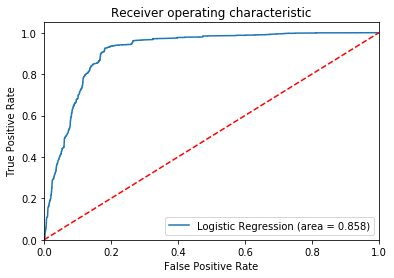

In [70]:
# AUC ROC for Logistic Regression

logit_roc_auc = roc_auc_score(y_test_lr, logreg.predict(x_test_lr))
fpr, tpr, thresholds = roc_curve(y_test_lr, logreg.predict_proba(x_test_lr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

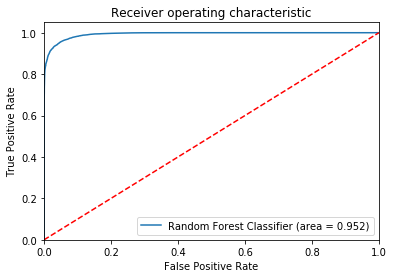

In [71]:
# AUC ROC for Random Forest Classifier

rf_roc_auc = roc_auc_score(y_test_rf, best_rf.predict(x_test_rf))
fpr, tpr, thresholds = roc_curve(y_test_rf, best_rf.predict_proba(x_test_rf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

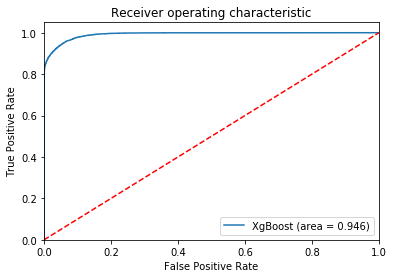

In [73]:
# AUC ROC for XgBoost Classifier

rf_roc_auc = roc_auc_score(y_test_xgb, best_xgb.predict(x_test_xgb))
fpr, tpr, thresholds = roc_curve(y_test_xgb, best_xgb.predict_proba(x_test_xgb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XgBoost (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XgBoost_ROC')
plt.show()